# **SW10: Dimensionality reduction**

In this tutorial, we apply the following dimensionality reduction techniques:

* Feature selection
* Linear disciminant analysis
* Principal component analysis
* t-SNE (for visualization)

The focus of this exercise is that you can apply the methods to some data.

Note: Every exercise in this notebook starts with the original data provided, 
In practice, one would combine the methods, begin with some feature selection,
before proceeding to further dimensionality reduction.

---

## **Setup**



In [1]:
# Basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Some Jupyter magic for nicer output
%config InlineBackend.figure_formats = ["svg"]   # Enable vectorized graphics

# Automatically reload modules that have changed
%load_ext autoreload
%autoreload 2

# Adjust the default settings for plots
import sys
sys.path.append("..")
import ml
ml.setup_plotting()

---

## **Data preparation**

The [make_blobs()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) 
function from scikit-learn generates random data points for a specified number 
of clusters. The data points are normally distributed around the cluster 
centers with a specified standard deviation. We then further stretch the data 
points to create elongated clusters.

In [2]:
n_samples = 5000     # Number of samples to generate
seed = 42            # Set to None to generate different data each time

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=n_samples, 
                           n_classes=3,
                           n_features=11, 
                           n_informative=3, 
                           n_redundant=3, 
                           n_repeated=2,
                           n_clusters_per_class=1, 
                           class_sep=2.0,
                           random_state=seed)

# Convert y into a categorical variable (with text labels)
y = pd.Categorical(y, categories=[0, 1, 2], ordered=True)
y = y.rename_categories(["Class 0", "Class 1", "Class 2"])

print("Number of samples:  %4d" % X.shape[0])
print("Number of features: %4d" % X.shape[1])

df = pd.DataFrame(X, columns=[f"Feature {i}" for i in range(X.shape[1])])
display(df.head())

Number of samples:  5000
Number of features:   11


,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10
0,-1.082180,1.841223,1.325309,1.841223,3.961862,3.961862,0.555294,-0.609984,0.798461,-4.663277,0.690757
1,-1.823440,4.030702,-0.529113,4.030702,2.737258,2.737258,0.336153,1.904908,-0.217713,-2.813966,3.420675
2,-1.786672,4.000757,0.877135,4.000757,2.834373,2.834373,1.560367,1.814839,0.589283,-2.880745,3.383824
3,-2.338108,2.310230,0.398868,2.310230,0.244358,0.244358,1.172721,2.305746,-0.061721,-2.401237,1.291615
4,0.653595,-1.351645,-1.277258,-1.351645,1.586049,1.586049,0.475840,-2.100127,-0.509333,-1.706390,-1.741444


---

## **Apply feature selection**

In the lecture, we have learned multiple ways to select the best features for a model.
In this Jupyter notebook, we limit ourselves to two methods: 
- Identify redundant features using the correlation matrix
- Use the feature importance from a tree-based model

<br>

### **Remove redundant features**

Features are redundant if they are linear combinations of each other or 
if they contain the same information in some other way. In a first step, 
let's try to identify redundant features by calculating the correlation
matrix of the features.

In [ ]:
########################
###    EXERCISE 1    ###
########################

# Given the feature matrix X, identify the features that are redundant.
# 
# Instructions:
#   1. Recapitulate the meaning of the correlation matrix
#   2. Calculate the correlation matrix of X
#   3. Visualize the correlation matrix using a heatmap
#   4. Identify the redundant features

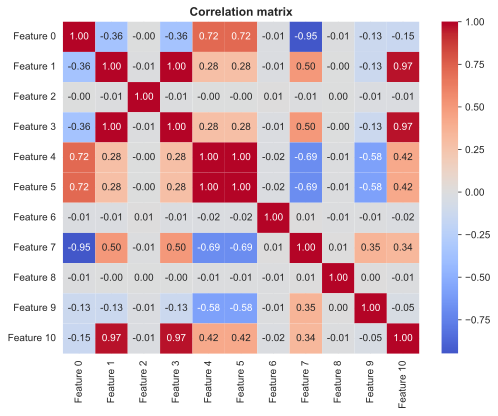

In [8]:
# Calculate the correlation matrix
corr = df.corr()
corr

#visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Correlation matrix")
plt.show()


In [ ]:
## Solution

# In this case (the results may look different on your machine), we can see that
# - Features 0 and 7 are highly negatively correlated (-0.9)
# - Features 1, 3 and 10 are very highly correlated (>0.95). They likely are
#   repeated or redundant features.
# - Features 4 and 5 are very highly correlated (>0.99). They likely are 
#   repeated or redundant features.
# - According to this summary, we may remove features 3, 5, 7, 10.
X_reduced = np.delete(X, [3, 5, 7, 10], axis=1)

### **Select by feature importance**

In a previous lecture, we have seen that feature importance is a useful tool
to identify the most relevant features for a given problem. Let's try this 
together.

In [ ]:
########################
###    EXERCISE 2    ###
########################

# Given the feature matrix X, identify the features that are irrelevant.
#
# Instructions:
#   1. Recapitulate the meaning feature importance
#   2. Calculate the feature importance of each feature
#   3. Visualize the feature importance using a bar plot
#   4. Identify the irrelevant features


In [10]:
#calculate the feature importance of each feature
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=seed)
rf.fit(X, y)
importances = rf.feature_importances_
importances


array([0.1617696 , 0.13409984, 0.00306115, 0.16508366, 0.06180125,
       0.04379238, 0.00365068, 0.17259216, 0.00292397, 0.02770113,
       0.22352417])

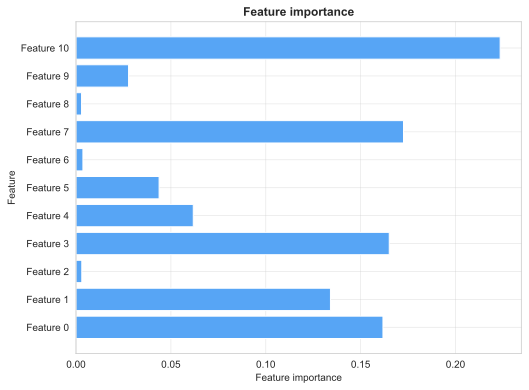

In [11]:
#visualize the feature importance using a bar plot
plt.figure(figsize=(8, 6))
plt.barh(df.columns, importances)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature importance")
plt.show()


In [ ]:
#irrelevant feature are Nr. 8,6 and 2

---

## **Apply LDA**

The linear discriminant analysis (LDA) is a method that reduces the 
dimensionality of the data by finding a low-dimensional space that maximizes
the separation between classes. For a binary classification problem, LDA
finds a 1D-direction in the feature space that maximizes the separation
between the two classes. For a multi-class classification problem with C 
classes, LDA finds a (C-1)-dimensional space that maximizes the separation.

Have a look at the extra notebook on LDA for more information!

In [ ]:
########################
###    EXERCISE 3    ###
########################

# Given the feature matrix X and the target vector y, compute the 
# Linear Discriminant Analysis (LDA) projection of the data and 
# visualize the first two components.

# Instructions:
#   1. Recapitulate the meaning of LDA (see notebook on LDA!)
#   2. Fit an LDA model to the data
#   3. Transform the data using the LDA model
#   4. Visualize the first two components

# Note: We look here at a multi-class classification problem, with 3 classes.
#       For 3 classes, LDA will be able to project the data into a 
#       2-dimensional space...

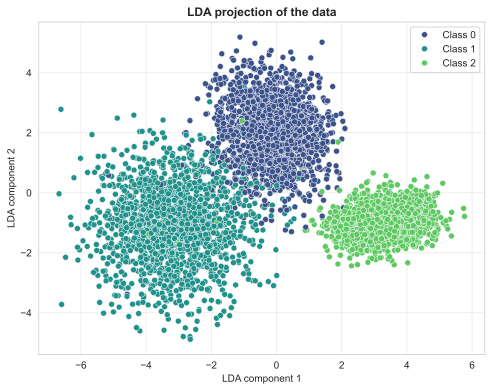

In [12]:
#fit an LDA model to the data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

#visualize the first two components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette="viridis")
plt.xlabel("LDA component 1")
plt.ylabel("LDA component 2")
plt.title("LDA projection of the data")
plt.show()


## **Principal component analysis**

The principal component analysis (PCA) is a method for dimensionality reduction.
Contrary to LDA, it is an unsupervised method, which means that it does not use
the target variable for the dimensionality reduction. Instead, PCA aims to find
the directions in the data that explain the most variance. The directions are
called principal components, and the method projects the data onto these components.
The principal components are orthogonal to each other, which means that they are
uncorrelated. The principal components are ordered by the amount of variance they
explain in the data. The first principal component explains the most variance, the
second principal component explains the second most variance, and so on. 
The PCA projection is useful for visualization of the data, and for reducing the
dimensionality of the data. The PCA projection can be used as input for other
machine learning algorithms, such as clustering, classification, or regression.

In [ ]:
########################
###    EXERCISE 4    ###
########################

# Given the feature matrix X, compute the Principal Component Analysis (PCA)
# projection of the data and visualize the first two components.

# Instructions:
#   1. Recapitulate the meaning of PCA (see notebook on PCA!)
#   2. Fit a PCA model to the data
#   3. Transform the data using the PCA model
#   4. Visualize the first two components
#   5. Compare the results of LDA and PCA

In [ ]:
#the LDAs are more separated than the PCAs and the PCAs are more spread out and not as separated as the LDAs.

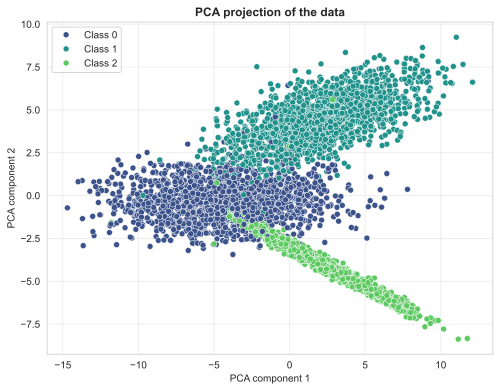

In [17]:
#fit a PCA model to the data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#visualize the first two components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("PCA projection of the data")
plt.show()



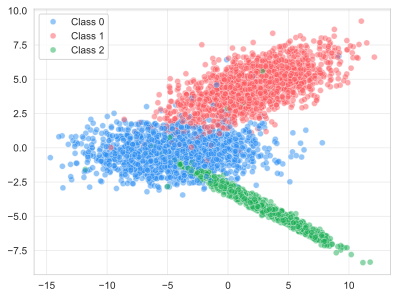

In [18]:
########################
###    SOLUTION 4    ###
########################

from sklearn.decomposition import PCA

# 1. Recap PCA:
################
#    - Principal Component Analysis (PCA) is a method for dimensionality
#      reduction and data visualization.
#    - PCA aims to find the linear combinations of features that capture the
#      most variance in the data.
#    - The method finds the directions in the data that capture the most
#      variance, called the principal components.
#    - The principal components are ordered by the amount of variance they
#      capture. The first principal component captures the most variance, the
#      second principal component captures the second most variance, and so on.

# 2. Fit a PCA model to the data
#################################
pca = PCA(n_components=2)
pca.fit(X)

# 3. Transform the data using the PCA model
############################################
X_reduced = pca.transform(X)

# 4. Visualize the first two components
########################################
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=pd.Categorical(y), 
                alpha=0.5, palette=ml.PALETTE_CMAP.colors)
plt.show()

# 5. Compare the results of LDA and PCA
########################################
# The PCA projection shows the directions in the data that capture the most
# variance. The LDA projection shows the directions in the data that best
# separate the classes. In this case, the LDA projection shows a clear
# separation between the classes, while the PCA projection shows the directions
# in the data that capture the most variance, but does not separate the classes
# as well as LDA.

In [21]:
########################
###    EXERCISE 5    ###
########################

# For visualization, we limit the dimensions to 2. However, in practice, we
# may want to use more dimensions. Compute the explained variance ratio for
# all principal components and visualize the cumulative explained variance.
# Which is the best choise for the number of components to include?




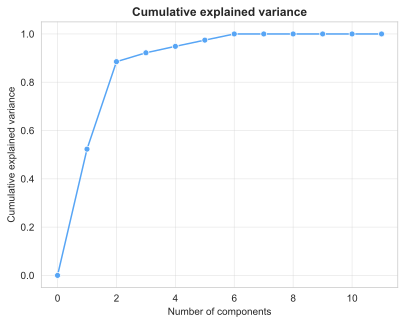

Number of components to capture at 95% of the variance: 5


In [20]:
########################
###    SOLUTION 5    ###
########################

# Fit a PCA model to the data, without limiting the number of components
pca = PCA(n_components=X.shape[1])
pca.fit(X)

# Compute the explained variance ratio for all principal components
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio = [0] + list(explained_variance_ratio)

# Visualize the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
sns.lineplot(x=range(0, len(cumulative_explained_variance)), 
             y=cumulative_explained_variance, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance")
plt.show()

# How many components are needed to capture 95% of the variance?
n_components = np.argmax(cumulative_explained_variance >= 0.95)
print(f"Number of components to capture at 95% of the variance: {n_components}")

## **Non-linear dimensionality reduction**

t-SNE is a non-linear dimensionality reduction technique that is often used
for visualization of high-dimensional data. The method aims to find a
low-dimensional representation of the data that preserves the local
structure of the data points. 

Because t-SNE does not preserve distances, it is not suitable for several
applications, such as distance-based clustering or classification. However,
it is very useful for visualization of high-dimensional data, where it can
reveal patterns and clusters that are not visible in the original data.

In [15]:
from sklearn.manifold import TSNE

# Fit a t-SNE model to the data
tsne = TSNE(n_components=2, random_state=42)

# Transform the data using the t-SNE model
# This step is relatively slow!
X_reduced = tsne.fit_transform(X)

KeyboardInterrupt: 

In [ ]:
# Visualize the first two components
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=y, 
                alpha=0.5, palette=ml.PALETTE_CMAP.colors)
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.title("t-SNE projection")
plt.show()

NameError: name 'X_reduced' is not defined